In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import utils
import utils_exponential_grid
from utils_exponential_grid import predictor_corrector_radial_shcrodinger_integrator_exponential_grid as integrator
from utils_exponential_grid import normlize_function_exponential_grid as normalizer
#from utils_exponential_grid import predictor_corrector_radial_shcrodinger_integrator_exponential_grid_p as integrator_p
from utils_exponential_grid import predictor_corrector_radial_poisson_equation_electronic_potential_exponential_grid as poisson_integrator

In [3]:
kwargs={'r_max':20.0, 'grid_points':3000,'delta':0.000065,  
        'l':0, 'Z':1.0, 'E':-0.5}

#if the wave functions explode while r-> 0.0 decrease the delta parameter and or the number of grid_points  

Energy_kwargs={'r_max':0.6, 'grid_points':30,'delta':0.001}

In [4]:
exp_grid= utils_exponential_grid.get_exponential_grid_reverse(kwargs)

In [5]:
ener_grid= -1.0*np.array(utils_exponential_grid.get_exponential_grid_reverse(Energy_kwargs))

In [6]:
u_hydr= utils.U_Hydrogen(exp_grid)
u_hydr_norm= normalizer(exp_grid, u_hydr)


In [7]:
#initial conditions
w10= u_hydr[0]#1.0e-8#u_hydr[0]
w20= (u_hydr[1] - u_hydr[0])/(exp_grid[0] - exp_grid[1])# (w10 - 1.2e-8)/(exp_grid[0] - exp_grid[1])#(u_hydr[1] - u_hydr[0])/(exp_grid[0] - exp_grid[1])

In [8]:
len(exp_grid)

3004

In [9]:
u_func= integrator(exp_grid, w10,w20, kwargs)
u_func_norm= normalizer(exp_grid, u_func)

In [10]:
len(u_func)

3004

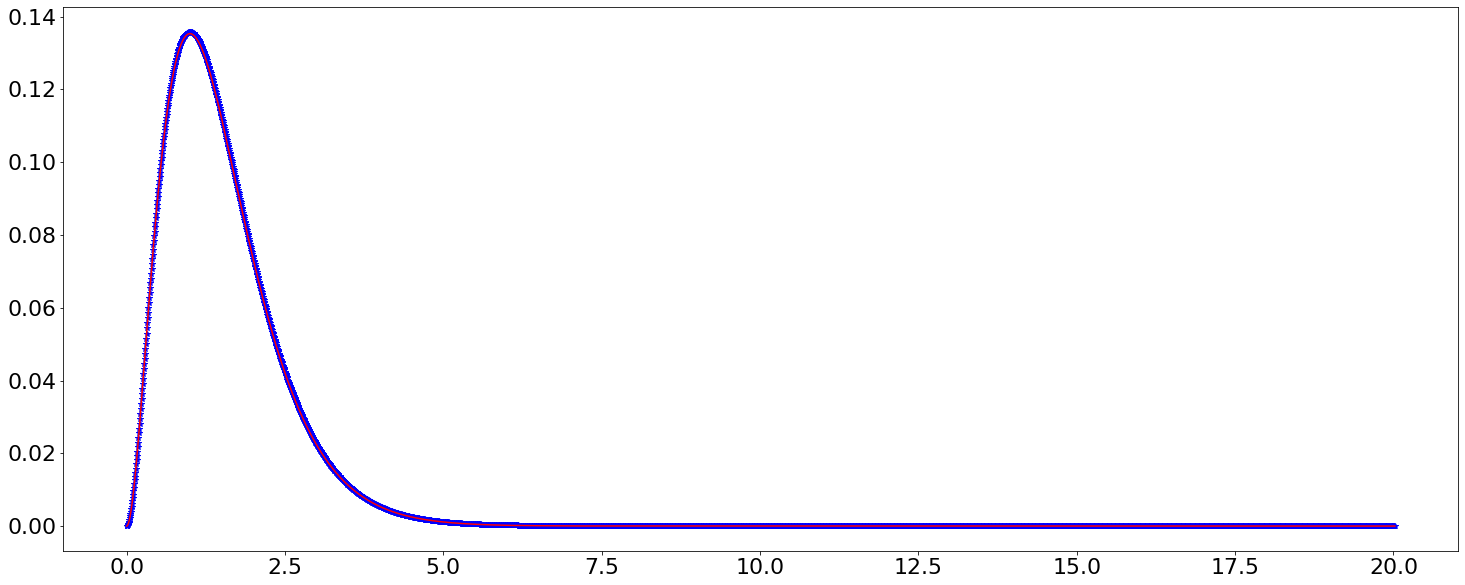

In [11]:
plt.plot(exp_grid,np.array(u_func)**2, '*b', exp_grid,np.array(u_hydr)**2, '-r')
plt.show()

In [12]:
we10= 0.0
we20= 1.0

In [13]:
ue= poisson_integrator(exp_grid,u_func_norm,we10,we20)

In [14]:
def get_ue_hydrogen(grid):
    r= np.array(grid)
    return -1.0*(np.multiply(np.add(r,1.0),np.exp(-2.0*r))) +1

In [15]:
ue_hydrogen=get_ue_hydrogen(exp_grid)

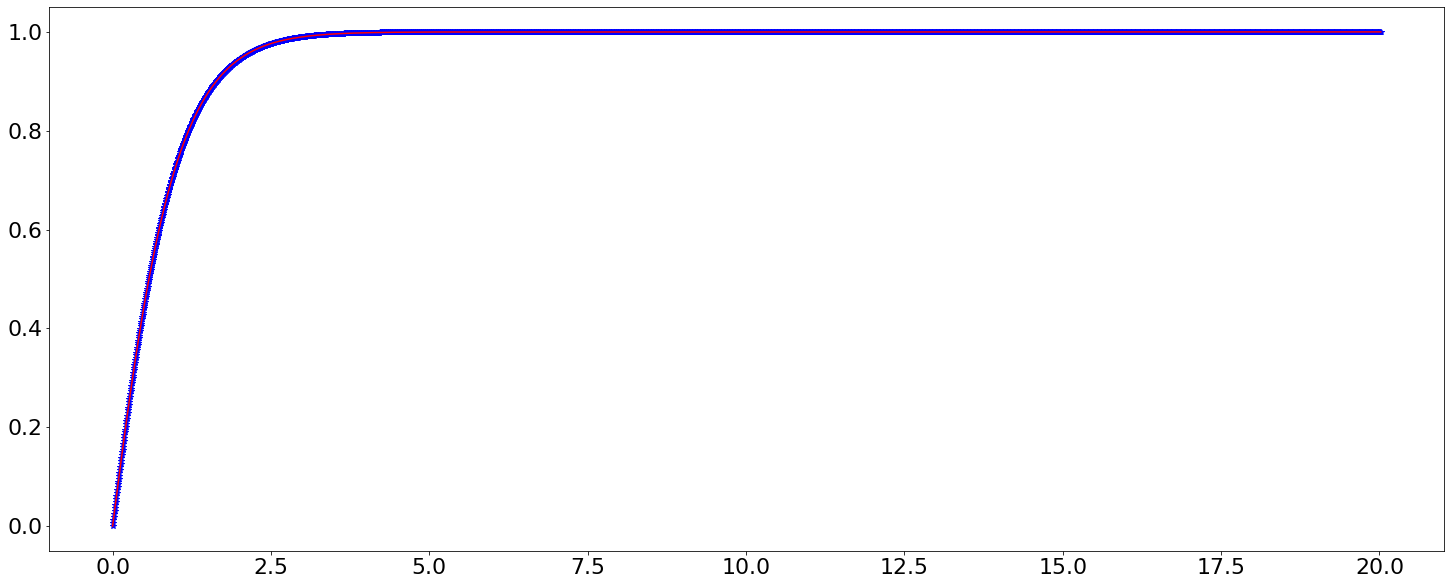

In [16]:
plt.plot(exp_grid,ue, '*b', exp_grid,ue_hydrogen, '-r')
plt.show()

In [17]:
def set_ue_boundery_condition(ue, grid, Q_max, backward_grid= True):
    if backward_grid:
        a= (Q_max - ue[0])/grid[0]
    return np.array(ue) + np.multiply(a,np.array(grid))

In [18]:
Q_max=1.0
ue_p= set_ue_boundery_condition(ue, exp_grid, Q_max)

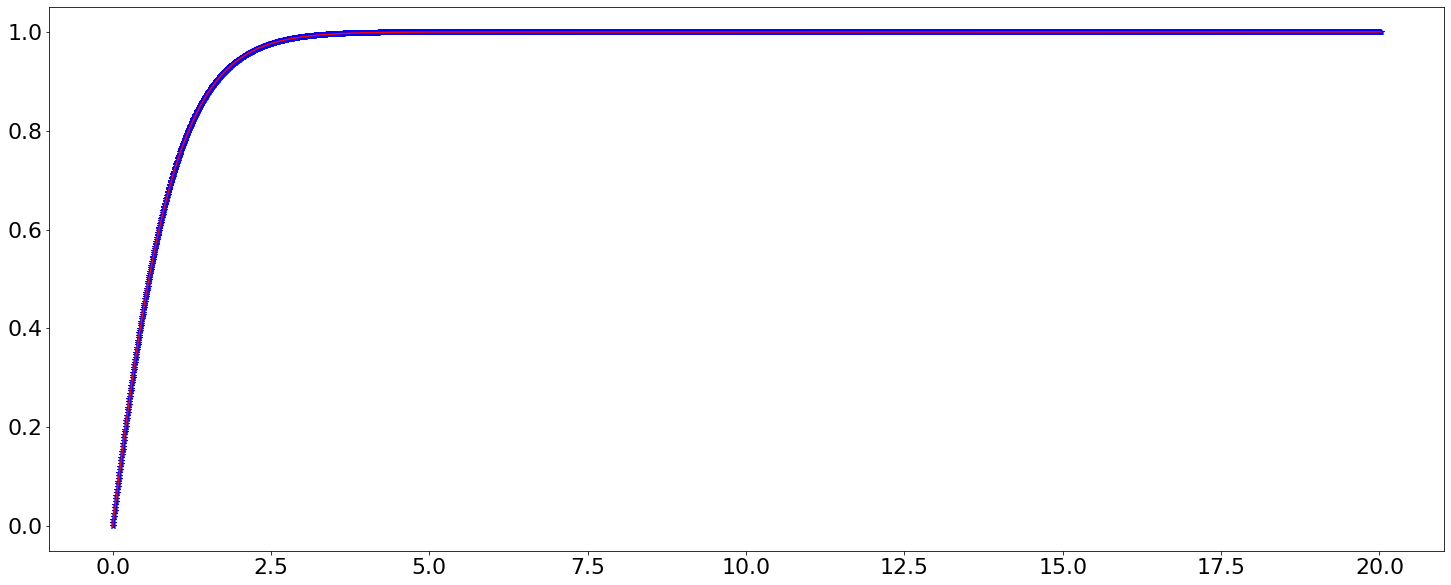

In [19]:
plt.plot(exp_grid,ue_p, '*b', exp_grid,ue_hydrogen, '-r')
plt.show()

In [20]:
ve= np.divide(ue_p,exp_grid)

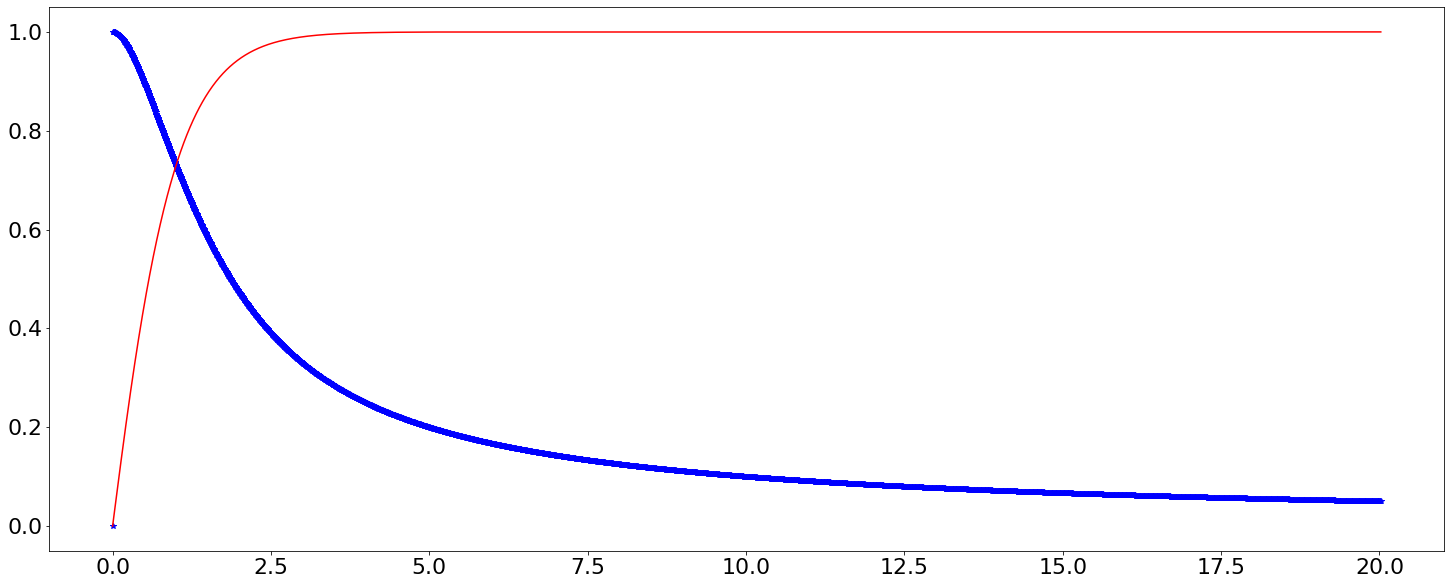

In [21]:
plt.plot(exp_grid,ve, '*b', exp_grid,ue_hydrogen, '-r')
plt.show()

In [22]:
#finding the potential using integration

In [58]:
def electronic_potential_from_integral(expo_grid, function):
    h_arra= np.flip(np.array(expo_grid[:-1]) - np.array(expo_grid[1:]))

    func_sqrt= np.flip(np.power(np.array(function),2))
    temp= np.multiply(np.divide(h_arra,2.0),np.add(func_sqrt[:-1],func_sqrt[1:]))
    out_funct=[np.sum(temp[:i])/r_i for i,r_i in enumerate(np.flip(expo_grid))]
    #out_funct[-1]=0.0
    out_funct.reverse()
    return out_funct

In [59]:
ve_inte= electronic_potential_from_integral(exp_grid, u_func)

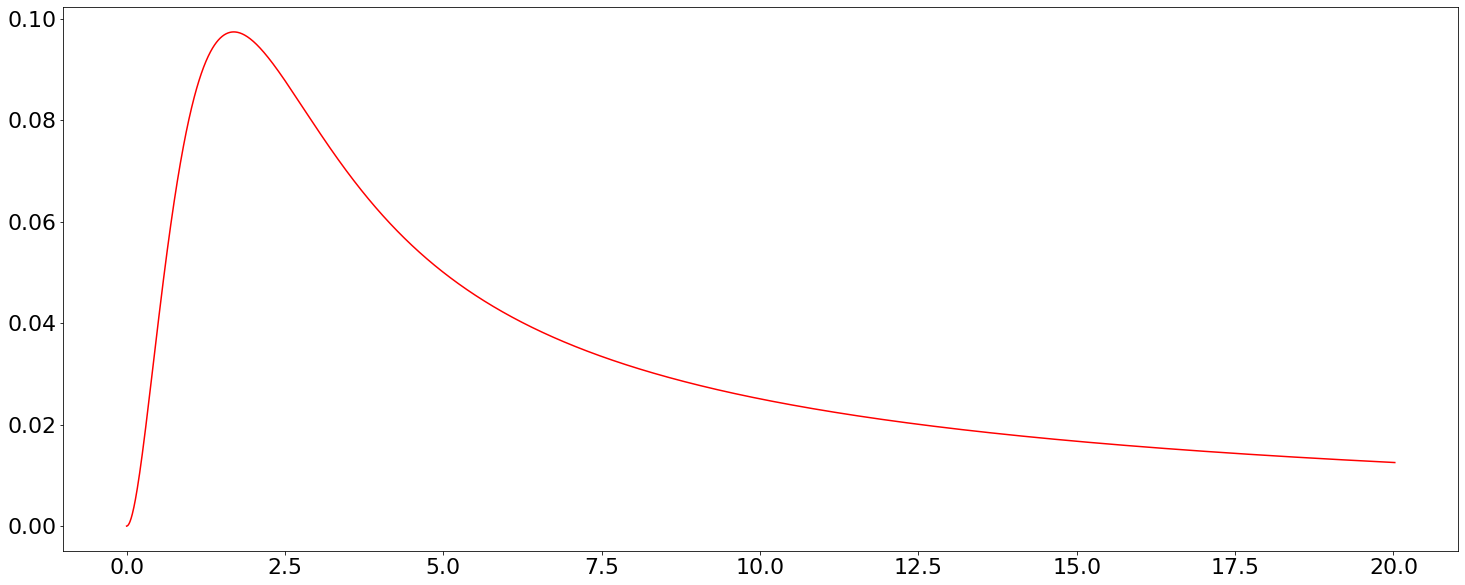

In [60]:
plt.plot( exp_grid,ve_inte,'-r')
plt.show()

In [51]:
len(ve_inte)

3004

In [3]:
temp_list=list(['q','g','t','l'])

In [4]:
temp_list.sort()
temp_list

['g', 'l', 'q', 't']

In [8]:
help(temp_list)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign